In [3]:
#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from  nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
from nltk import classify
from nltk.tokenize import TweetTokenizer
from nltk import NaiveBayesClassifier


#import regex
import re

#import BeautifulSoup
from bs4 import BeautifulSoup

# Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import text 
from sklearn.decomposition import LatentDirichletAllocation
from nltk.util import ngrams
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction import text
from sklearn.feature_extraction import stop_words

# Word2vec
import gensim

#plotting
import matplotlib.pyplot as plt

# etc
import string
import pandas as pd
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools


/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
Columns  = ["sentiment", "user_id", "date", "query", "username", "text"]
Date = "ISO-8859-1"

In [4]:
tweets = pd.read_csv("Data/tweets.csv", encoding = Date, names = Columns)

In [10]:
#Filter by sentiment and text
tweets =tweets[['sentiment', 'text']]

In [11]:
tweets_df = tweets[['sentiment', 'text']]
y = tweets_df['sentiment']


In [12]:
#Map target value(y) to sentiment strings
sentiment_mapping = {0: "NEGATIVE", 2: "NEUTRAL", 4: "POSITIVE"}
def map_sentiment(input):
    return sentiment_mapping[int(input)]

In [13]:
#apply sentiment mapping to all of the dataset
y_samp = tweets_df['sentiment'].apply(lambda x: map_sentiment(x))


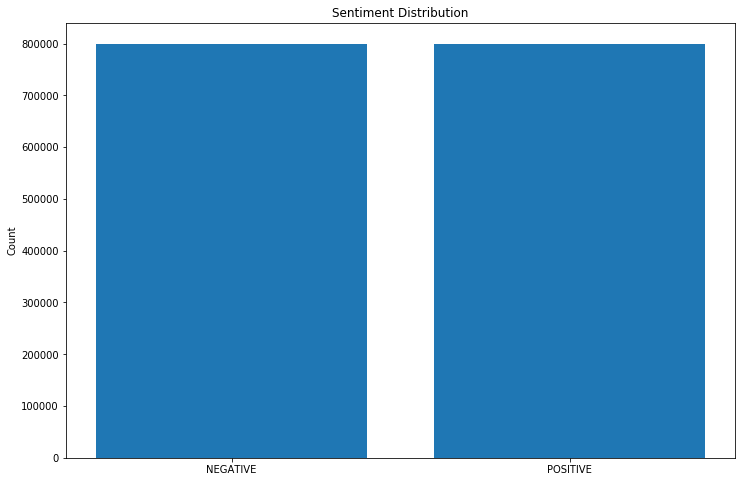

In [14]:
#plot distribution

plt.figure(figsize=(12,8))
plt.bar(Counter(y_samp).keys(), Counter(y).values())
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

In [15]:
tweets_clean= tweets_df.text.apply(lambda x: ' '.join(re.findall('[A-Za-z]+', x)))

In [17]:
#remove certain words that may affect sentiment and stopwords
#list_to_remove = ["quot", "go", "got"]
stop_words = stopwords.words("english")
#stop_words_final = [e for e in stop_words if e not in list_to_remove]
'on' in stop_words

True

In [19]:
#data cleaning
punct = string.punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punct))


In [20]:
tweets['text'] = tweets_clean.apply(lambda text: remove_punctuation(text))


In [32]:
stemmer = PorterStemmer()
more_stop_words =  ('go', 'got', 'quot', 'amp', 'nan')
stop_words = text.ENGLISH_STOP_WORDS.union(more_stop_words)
def clean(text, stem=True):
    #removed links and chars
    remove = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(remove, ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split(): 
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
        
            else:
                tokens.append(token)
    return " ".join(tokens)



In [33]:
tweets_clean = tweets.text.apply(lambda x: clean(x))

In [ ]:
lem = nltk.WordNetLemmatizer()
def lem_clean(data):
    text = [lem.lemmatize(word) for word in data]
    return data

tweets_cleaned = tweets_clean.apply(lambda x: lem_clean(x))

In [34]:
from collections import Counter
cnt = Counter()
for text in tweets_clean.values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(10)

#could be bot tweets - remove quote, go get, not no

[('s', 192873),
 ('t', 185904),
 ('m', 140837),
 ('just', 127168),
 ('day', 109411),
 ('good', 92597),
 ('work', 87890),
 ('like', 83850),
 ('love', 83073),
 ('http', 71650)]

In [70]:
tweets_concat = pd.concat([tweets_cleaned, y], axis=1)

In [ ]:
samp = tweets_df.sample(n=100000,replace=False)

In [71]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tweets_cleaned[tweets_cleaned['sentiment'] == 'POSITIVE'].text))
plt.imshow(wc , interpolation = 'bilinear')

KeyError: 'sentiment'

<Figure size 1440x1440 with 0 Axes>

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(tweets_cleaned[twit_samp['sentiment'] == 'NEGATIVE'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
vectorizer = CountVectorizer(stop_words=stop_words, max_df=0.85, min_df=1, max_features=5000, ngram_range=(1,3))
X = vectorizer.fit_transform(twit_samp['text'])

In [ ]:
features = vectorizer.get_feature_names()

In [125]:
len(features)

5000

In [ ]:
lda = LatentDirichletAllocation(n_components=10, random_state=42, learning_method='online', n_jobs=-1)
lda.fit(X)
top_components = lda.components_.argsort()[:,-1:-11:-1]

for i, v in enumerate(top_components):
    print(i, [features[i] for i in v])

In [118]:
samp = tweets_df.sample(n=1000,replace=False)
samp

,sentiment,text
557758,0,@NoreeN_Ong hungry too
270987,0,"Ugh, food poisoning - nature's way of telling ..."
399185,0,@patzilla83 ...and i would have X's for eyes
1142720,4,@Alyssa_Milano Hope you had a great dinner...h...
1133283,4,"@mandelion2 hey love, add me!"
315737,0,"Was just listening to Alfamega - Uh Huh, great..."
1280029,4,"my nagging paid off, I am now a VIW!!!"
433615,0,i have a brick of a phone that has a black and...
1144503,4,@MissKeriBaby aww wish i could have caught tha...
1539779,4,happiness is...music monday enjoy! - gratefu...


In [119]:
X = CountVectorizer().fit_transform(samp['text'])
y = samp['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

multi_naive_bayes = MultinomialNB()
multi_naive_bayes.fit(X_train, y_train)
np.mean(multi_naive_bayes.predict(X_test) == y_test)

0.68

In [129]:
test = np.array(['hello', 'y']).reshape(-1,1)

X =CountVectorizer().fit_transform(test)
multi_naive_bayes.predict(test)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [ ]:
classifier = NaiveBayesClassifier.train(X_train)

# Output the model accuracy on the train and test data
print('Accuracy on train data:', classify.accuracy(classifier, X_train))
print('Accuracy on test data:', classify.accuracy(classifier, X_test))

# Output the words that provide the most information about the sentiment of a tweet.
# These are words that are heavily present in one sentiment group and very rarely present in the other group.
print(classifier.show_most_informative_features(20))


In [2]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence